In [1]:
from math import sqrt, log, atan

## Physical constants

In [2]:
# electron rest energy
mc2 = 0.5110034 #MeV

In [3]:
# classical electron radius
r_e = 2.8179380e-13 #cm

In [4]:
# Avogadro constant
N_A = 6.022045e+23 # 1/mol

In [5]:
# fine structure constant
alpha = 1 / 137.03604

In [6]:
# milibarn to square centimeter conversion factor          
mb_to_cm2 = 1e-27 #cm**2

In [7]:
1 / mb_to_cm2

1e+27

## Problem parameters

In [8]:
def beta(E):
    '''given E in MeV, returns beta factor v/c'''
    return sqrt(1 - 1 / (1 + E / mc2)**2)

The mass radiative stopping power is defined as
$$ - \frac{1}{\rho}\left(\frac{dE}{dx}\right)_{\text{rad}} \left[ \frac{\text{MeV} \, \text{cm}^2}{\text{g}}\right]$$

In [9]:
def mass_radiative_stopping_power(A, Z, E, phi_r):
    return N_A / A * alpha * r_e**2 * Z**2 * (E + mc2) * phi_r

In [10]:
# photon energy
W = 2 #MeV

In [11]:
# electron energy
E = 5 #MeV

In [12]:
# reduced photon energy
kappa = W/E

In [13]:
# beta = v/c
b = beta(E)

## Silver

In [14]:
# atomic number
Z = 47 # silver

In [15]:
# standard atomic weight
A = 107.868

In [16]:
# mass density
rho = 10.50 # g/cm**3

The scaled bremsstrahlung differential cross-section in mb per atom is:
$$\chi(Z,E,\kappa) = \frac{\beta^2}{Z^2} W \frac{d \sigma_{\text{br}}}{dW} $$

In [17]:
# scaled bremsstrahlung differential cross-section
chi = 6.586 # mb/atom

In [18]:
# scaled dimensionless integrated bremsstrahlung energy-loss cross section
phi_rad = 9.692 # for E = 5 MeV

## Results

The bremsstrahlung differential cross-section is
$$\frac{d \sigma_{\text{br}}}{dW} \left[ \frac{\text{cm}^2}{\text{MeV}\, \text{atom}} \right]$$

In [19]:
# bremsstrahlung differential cross-section
Z**2 / b**2 * chi * mb_to_cm2 / W

7.337321661952883e-24

The mean electron energy loss per unit path length is
$$ -\left(\frac{dE}{dx}\right)_{\text{rad}} \left[ \frac{\text{MeV} }{\text{cm}}\right]$$

In [20]:
# mean electron energy loss per unit path length
rho * mass_radiative_stopping_power(A,Z,E,phi_rad) # MeV/cm

4.007823028979774

## Tungsten

In [21]:
Z = 74 # tungsten
rho = 19.3 # g/cm**3
A = 183.84

In [22]:
print('Z={}, E={}, kappa={}'.format(Z,E,kappa))

Z=74, E=5, kappa=0.4


In [23]:
chi = 6.296
phi_rad = 9.324

The bremsstrahlung differential cross-section is
$$\frac{d \sigma_{\text{br}}}{dW} \left[ \frac{\text{cm}^2}{\text{MeV}\, \text{atom}} \right]$$

In [24]:
Z**2 / b**2 * chi * mb_to_cm2 / W

1.7387945695039684e-23

The mean electron energy loss per unit path length is
$$ -\left(\frac{dE}{dx}\right)_{\text{rad}} \left[ \frac{\text{MeV} }{\text{cm}}\right]$$

In [25]:
rho * mass_radiative_stopping_power(A,Z,E,phi_rad)

10.308269029993406

## Parametric study

We want photon energy W = 14 MeV.

In [26]:
E_chosen = [15, 20, 30, 50, 80, 140] # MeV

In [27]:
k_chosen = [0.95, 0.7, 0.5, 0.3, 0.2, 0.1]

In [28]:
# W in MeV
uus = [k * E for (k, E) in zip(k_chosen, E_chosen)]

In [29]:
uus

[14.25, 14.0, 15.0, 15.0, 16.0, 14.0]

In [30]:
# anal_chis = [bh_chi(14, e) for e in E_chosen]

In [31]:
chis = [2.787, 5.417, 6.765, 8.170, 9.039, 10.]

In [32]:
for k, E, chi in zip(k_chosen, E_chosen, chis):
    print('k={}, E={}, chi={}'.format(k, E, chi))

k=0.95, E=15, chi=2.787
k=0.7, E=20, chi=5.417
k=0.5, E=30, chi=6.765
k=0.3, E=50, chi=8.17
k=0.2, E=80, chi=9.039
k=0.1, E=140, chi=10.0


In [33]:
# max 12

In [34]:
import matplotlib.pyplot as plt

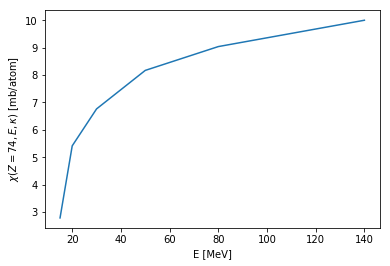

In [35]:
plt.plot(E_chosen, chis)
# plt.plot(E_chosen, anal_chis)
plt.xlabel('E [MeV]')
plt.ylabel(r'$\chi(Z=74,E,\kappa)$ [mb/atom]');

In [36]:
14/312

0.04487179487179487

In [37]:
0.1/2

0.05

## Analytics

Bethe-Heitler differential cross section for bremsstrahlung.
ISBN 978-92-64-99066-1, p. 158

The relativistic kinetic energy is:
$$E = (\gamma - 1)m c^2$$

In [38]:
def gamma(E):
    '''Lorentz factor.'''
    return 1 + E / mc2

In [39]:
def epsilon(W, E):
    return W / (gamma(E) * mc2)

The reduced screening radius (rsr) $R m c / \hbar = 24.941$ for $Z = 74$ (tungsten) and $\eta = 1.204$. Table 2.2 p. 91.

In [40]:
rsr = 24.941
eta = 1.204

In [41]:
def b_factor(W, E):
    eps = epsilon(W, E)
    g = gamma(E)
    return rsr * 1 / (2*g) * eps / (1 - eps)

In [42]:
def phi_1(W, E):
    b = b_factor(W, E)
    phi = 4*log(rsr) + 2 - 2*log(1 + b**2) - 4*b*atan(1/b)
    return phi

In [43]:
def phi_2(W, E):
    b = b_factor(W, E)
    phi = 4*log(rsr) + 7/3 - 2*log(1 + b**2) - 6*b*atan(1/b) - b**2 * (4 - 4*b*atan(1/b) - 3*log(1 + 1/b**2))
    return phi    

In [44]:

Z

74

In [45]:
def bh_chi(W,E):
    '''Scaled bremsstrahlung differential cross section in mb/atom.'''
    eps = epsilon(W, E)
    b = beta(E)
    return b**2 / Z * r_e**2 * alpha * (Z + eta)\
           * (eps**2 * phi_1(W,E) + 4/3*(1-eps)*phi_2(W,E)) / mb_to_cm2

In [46]:
bh_chi(W, E)

11.761423393836692

In [47]:
chi = 6.296

In [48]:
W

2

In [49]:
E

140

In [50]:
1.73/1.82

0.9505494505494505

In [51]:
[bh_chi(14, E) for E in E_chosen]

[3.041421758642672,
 6.015488104193829,
 7.612370556464346,
 9.050442338014955,
 10.024215662814948,
 10.799045857005943]

In [52]:
T1 = 312 # MeV

In [53]:
import numpy as np

In [54]:
np.linspace(0, 1, 10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [55]:
ddw = [T1 * k for k in np.linspace(0.01, 1, 100)]

In [57]:
a = [bh_chi(w, T1) for w in ddw]

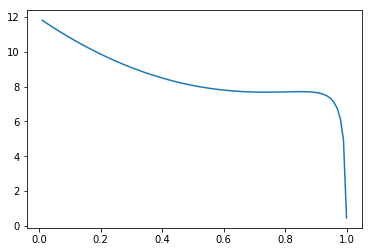

In [58]:
plt.plot(np.linspace(0.01, 1, 100), a)

In [69]:
anal_chis = [bh_chi(14, e) for e in np.linspace(15, 500, 100)]

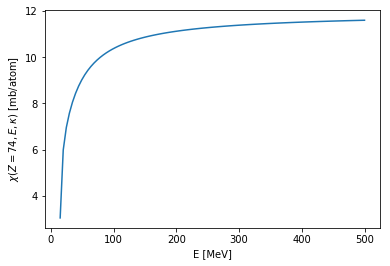

In [70]:
plt.plot(np.linspace(15, 500, 100), anal_chis)
plt.xlabel('E [MeV]')
plt.ylabel(r'$\chi(Z=74,E,\kappa)$ [mb/atom]');